In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

In [4]:
rectangles = np.genfromtxt('sample_data.csv', delimiter=',')
max_width = rectangles[:,2].max()
max_height = rectangles[:,3].max()

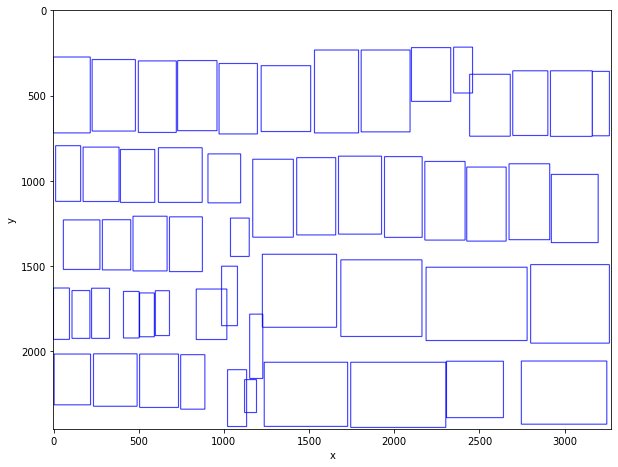

In [16]:
blank = 255*np.ones(shape=[int(max_height+10), int(max_width+10), 3], dtype=np.uint8)

for rec in rectangles:

    c1 = tuple(map(int, rec[0:2]))
    c2 = tuple(map(int, rec[2:4]))

    cv2.rectangle(blank, pt1 = c1, pt2 = c2, color=(0,0,255), thickness=3)


plt.figure(figsize = (10,10))
plt.imshow(blank)
plt.xlabel('x')
plt.ylabel('y');

In [26]:
def get_dist_2p(pt1, pt2):
    return np.linalg.norm([pt1[0]-pt2[0], pt1[1]-pt2[1]])


def get_block(ref_box, other_box):
    rb_left, rb_low, rb_right, rb_upper = ref_box
    ob_left, ob_low, ob_right, ob_upper = other_box
    if ob_right < rb_left:
        if ob_low > rb_upper:
            block = 1
        elif ob_upper < rb_low:
            block = 7
        else:
            block = 8
    elif ob_left > rb_right:
        if ob_low > rb_upper:
            block = 3
        elif ob_upper < rb_low:
            block = 5
        else:
            block = 4
    else:
        if ob_low > rb_upper:
            block = 2
        elif ob_upper < rb_low:
            block = 6
        else:
            block = 9
    return block


def get_four_points(box):
    p11 = (box[0], box[1])
    p22 = (box[2], box[3])
    p12 = (box[2], box[1])
    p21 = (box[0], box[3])
    return p11, p22, p12, p21


def get_distance(ref_box, other_box):
    block = get_block(ref_box, other_box)
    rb_p11, rb_p22, rb_p12, rb_p21 = get_four_points(ref_box)
    ob_p11, ob_p22, ob_p12, ob_p21 = get_four_points(other_box)
    if block == 1:
        dis = get_dist_2p(ob_p12, rb_p21)
    elif block == 2:
        dis = ob_p11[1] - rb_p22[1]
    elif block == 3:
        dis = get_dist_2p(ob_p11, rb_p22)
    elif block == 4:
        dis = ob_p11[0] - rb_p22[0]
    elif block == 5:
        dis = get_dist_2p(ob_p21, rb_p12)
    elif block == 6:
        dis =  rb_p11[1] - ob_p22[1]
    elif block == 7:
        dis = get_dist_2p(ob_p22, rb_p11)
    elif block ==8:
        dis = rb_p11[0] - ob_p22[0]
    else:
        dis = 0
    return dis

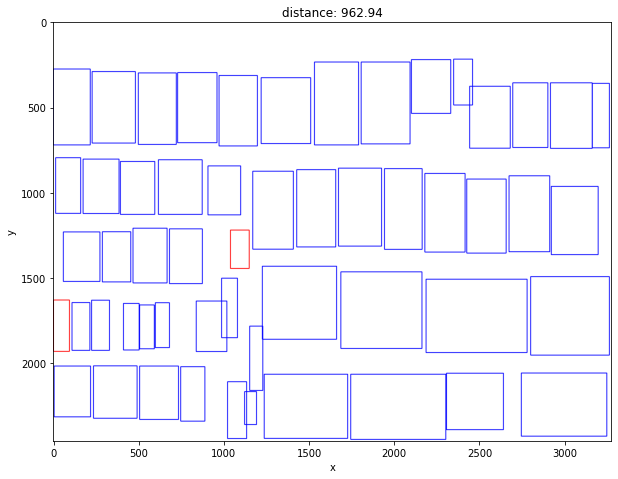

In [29]:
index_1 = 10
index_2 = 25

blank = 255*np.ones(shape=[int(max_height+10), int(max_width+10), 3], dtype=np.uint8)

for i, rec in enumerate(rectangles):

    c1 = tuple(map(int, rec[0:2]))
    c2 = tuple(map(int, rec[2:4]))
    
    if i in [index_1, index_2]:
        cv2.rectangle(blank, pt1 = c1, pt2 = c2, color=(255,0,0), thickness=3)
    else:
        cv2.rectangle(blank, pt1 = c1, pt2 = c2, color=(0,0,255), thickness=3)


plt.figure(figsize = (10,10))
plt.imshow(blank)
plt.xlabel('x')
plt.ylabel('y')

dis = get_distance(rectangles[index_1],rectangles[index_2])
plt.title('distance: '+str(round(dis,2)));

In [34]:
tot_recs = rectangles.shape[0]
distances = np.zeros((tot_recs, tot_recs))

for i, rec_ref in enumerate(rectangles):
    for j, ref_other in enumerate(rectangles):
        distances[i,j] = get_distance(rec_ref,ref_other)

In [56]:
clustering = DBSCAN(eps = 40, min_samples=2, metric='precomputed').fit(distances)
clustering.labels_

array([ 0, -1,  0,  0,  1,  1,  1,  1,  0,  2,  3,  2,  2,  3,  3,  4,  0,
        0,  4,  0,  0,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  0,  0], dtype=int64)

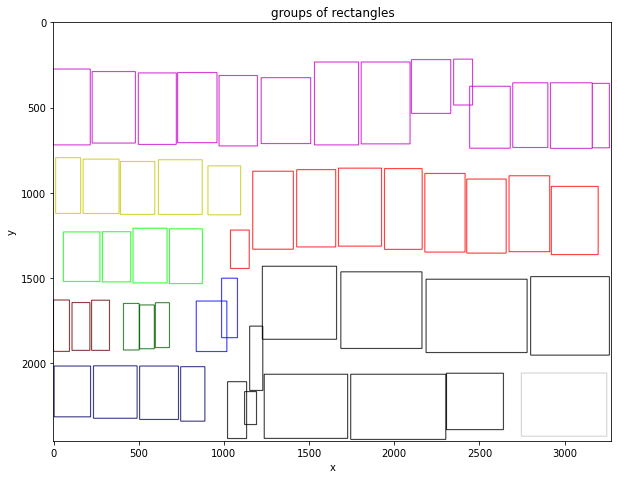

In [57]:
colors = [
    (0,0,0),
    (0,0,100),
    (0,100,0),
    (100,0,0),
    (0,0,255),
    (0,255,0),
    (255,0,0),
    (200,200,0),
    (200,0,200),
    (0,200,200),
    (100,100,0),
    (100,0,100),
    (0,100,100),
]

blank = 255*np.ones(shape=[int(max_height+10), int(max_width+10), 3], dtype=np.uint8)

for group, rec in zip(clustering.labels_, rectangles):

    c1 = tuple(map(int, rec[0:2]))
    c2 = tuple(map(int, rec[2:4]))
    
    if group == -1:
        cv2.rectangle(blank, pt1 = c1, pt2 = c2, color=(200,200,200), thickness=3)
    else:
        cv2.rectangle(blank, pt1 = c1, pt2 = c2, color=colors[group], thickness=3)


plt.figure(figsize = (10,10))
plt.imshow(blank)
plt.xlabel('x')
plt.ylabel('y')
plt.title('groups of rectangles');